# 9

The aqueous reaction $ A \to R + S $ proceeds as follows:

|Time, min|0|36|65|100|160|$\infty$|
|---|---|---|---|---|---|---|
|$C_A$, mol/L|0.1823|0.1453|0.1216|0.1025|0.0795|0.0494|

with

$C_{A0}$ = 0.1823 mol/l,

$C_{R0}$ = 0,

$C_{S0}$ = 55 mol/l.

Find the rate equation for this reaction. [$-r_A = 6.76\times 10^{-3}$ $CA - 4.54\times 10^{-5} C_RC_S$]

In [ ]:
#aquaeous - liquid phase reaction, no ideal gas law needed
#doesn't go to completion - some A left at infinity
    #reversible
#elementary reaction
#Kc = K1/K2 = CRe*CSe/CAe  - equilibrium info from infinite time
#rA = -K1*CA + K2*CR*CS = -K1*CA + (K1/Kc)*CR*CS
#CAe = 0.0494 #mol/L
#CAo = 0.1823 #mol/L
#deltaCA = CAe - CAo  - need this to find R and S without fitting
#CRe = CRo - deltaCA (deltaCA is negative)
#CSe = CSo - deltaCA 
# now we can get Kc


In [1]:
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
CAe = 0.0494 #mol/L
CAo = 0.1823 #mol/L
CRo = 0 #mol/L
CSo = 55 #mol/L
deltaCA = CAe - CAo 
CRe = CRo - deltaCA
CSe = CSo - deltaCA 
kc = CRe*CSe/CAe
kc

148.32312570850203

In [10]:
data = array([[0,0.1823],
              [36,0.1453],
              [65,0.1216],
              [100,0.1025],
              [160,0.0795],
              [700,0.0494]])
t = data[:,0]
CAi = data[:,1]

In [9]:
#rA = -k1*CA + k2*CR*CS
#kc = k1/k2
def func (C,t):
    CA, CR, CS = C
    rA = -k1*CA + (k1/kc)*(CR*CS)
    rR = -rA
    rS = -rA
    dCAdt = rA
    dCRdt = rR
    dCSdt = rS
    return [dCAdt,dCRdt,dCSdt]

4.517164783303882e-05

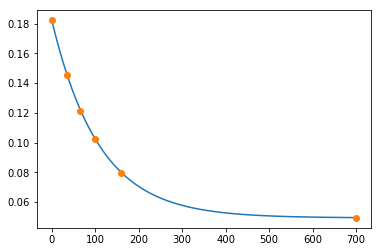

In [20]:
k1 = 0.0067
tspan = linspace(0,700,1000)

vals = odeint(func,[CAo,CRo,CSo],tspan)
CA = vals[:,0]

plt.plot(tspan,CA,'-',t, CAi,'o')
k2 = k1/kc
k2

In [21]:
print('-rA=',k1,'*CA + ',k1/kc,'*CR*CS')

-rA= 0.0067 *CA +  4.517164783303882e-05 *CR*CS
